In [84]:
%matplotlib inline
import torch
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import torch.nn as nn
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt

## Loading Data

### Using TensorDataset

In [3]:
# load data
animals = pd.read_csv('../../data/animals.csv')
animals

,animal_name,hair,feathers,eggs,milk,predator,legs,tail,type
0,sparrow,0,1,1,0,0,2,1,0
1,eagle,0,1,1,0,1,2,1,0
2,cat,1,0,0,1,1,4,1,1
3,dog,1,0,0,1,0,4,1,1
4,lizard,0,0,1,0,1,4,1,2


In [5]:
# Convert X and y into tensors and create a TensorDataset.
X = animals.iloc[:, 1:-1].to_numpy()  
y = animals.iloc[:, -1].to_numpy()

# Create a dataset
dataset = TensorDataset(torch.tensor(X), torch.tensor(y))

# Print the first sample
input_sample, label_sample = dataset[0]
print('Input sample:', input_sample)
print('Label sample:', label_sample)

Input sample: tensor([0, 1, 1, 0, 0, 2, 1])
Label sample: tensor(0)


### Using DataLoader

In [8]:
# Create a DataLoader using dataset, setting a batch size of two and enabling shuffling.
dataloader = DataLoader(dataset=dataset, batch_size=2,shuffle=True)

# Iterate over the dataloader
for batch_inputs, batch_labels in dataloader:
    print('batch_inputs:', batch_inputs)
    print('batch_labels:', batch_labels)

batch_inputs: tensor([[0, 1, 1, 0, 0, 2, 1],
        [0, 1, 1, 0, 1, 2, 1]])
batch_labels: tensor([0, 0])
batch_inputs: tensor([[1, 0, 0, 1, 1, 4, 1],
        [1, 0, 0, 1, 0, 4, 1]])
batch_labels: tensor([1, 1])
batch_inputs: tensor([[0, 0, 1, 0, 1, 4, 1]])
batch_labels: tensor([2])


## Training Loop

### Using the MSELoss

In [13]:
y_pred = np.array([3, 5.0, 2.5, 7.0])  
y = np.array([3.0, 4.5, 2.0, 8.0]) 

# Calculate MSE using NumPy
mse_numpy = np.mean((y_pred -y)**2)

# Create the MSELoss function in PyTorch
criterion = nn.MSELoss()

# Calculate MSE using PyTorch
mse_pytorch = criterion(torch.tensor(y_pred), torch.tensor(y))

print("MSE (NumPy):", mse_numpy)
print("MSE (PyTorch):", mse_pytorch)


MSE (NumPy): 0.375
MSE (PyTorch): tensor(0.3750, dtype=torch.float64)


### Writing a training loop

In [73]:
def show_results(model, dataloader):
    model.eval()
    iter_loader = iter(dataloader)
    for _ in range(3):
        feature, target = next(iter_loader)
        preds = model(feature)
        for p, t in zip(preds, target):
            print(f'Ground truth salary: {t.item():.3f}. Predicted salary: {p.item():.3f}.')

In [74]:
# Data Prep
import ast
fl = open("../../data/salary.txt", "r")
data = fl.readlines()
data= ast.literal_eval(data[0])
fl.close()

columns = ['experience_level','employment_type','remote_ratio','company_size','salary_in_usd']
salaries = pd.DataFrame(data=data, columns=columns)

# Define the conversion dictionary
convert_dict = {'experience_level': int, 'employment_type': int, 'company_size': int}
salaries = salaries.astype(convert_dict)
salaries


,experience_level,employment_type,remote_ratio,company_size,salary_in_usd
0,1,0,0.0,2,0.133055
1,2,0,0.0,0,0.433333
2,2,0,0.5,1,0.181707
3,1,0,0.0,0,0.033333
4,2,0,0.5,2,0.250000
...,...,...,...,...,...
602,2,0,1.0,1,0.256667
603,2,0,1.0,1,0.210000
604,2,0,0.0,1,0.215000
605,2,0,1.0,1,0.250000


In [75]:
### Before the training loop
features = salaries.iloc[:,:-1]
features = features.to_numpy()
target = salaries.iloc[:,-1]
target = target.to_numpy()

# # Create the dataset and the dataloader
dataset = TensorDataset(torch.tensor(features).float(), torch.tensor(target).float())

dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Create the model
model = nn.Sequential(
    nn.Linear(4, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1)
)

# Create the loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [77]:
num_epochs = 5
for epoch in range(num_epochs):
    for data in dataloader:
        # Set the gradients to zero
        optimizer.zero_grad()
        
        # Get feature and target from the data loader
        feature, target = data
        
        # Run a forward pass
        pred = model(feature)
        
        # Compute the loss
        loss = criterion(pred, target.unsqueeze(1))
        
        # Compute the gradients
        loss.backward()
        
        # Update the model's parameters
        optimizer.step()

show_results(model, dataloader)    

Ground truth salary: 0.225. Predicted salary: 0.222.
Ground truth salary: 0.082. Predicted salary: 0.058.
Ground truth salary: 0.151. Predicted salary: 0.215.
Ground truth salary: 0.097. Predicted salary: 0.172.
Ground truth salary: 0.133. Predicted salary: 0.279.
Ground truth salary: 0.067. Predicted salary: 0.202.
Ground truth salary: 0.133. Predicted salary: 0.222.
Ground truth salary: 0.041. Predicted salary: 0.123.
Ground truth salary: 0.102. Predicted salary: 0.215.
Ground truth salary: 0.146. Predicted salary: 0.170.
Ground truth salary: 0.112. Predicted salary: 0.110.
Ground truth salary: 0.167. Predicted salary: 0.172.


## RelU Activation

### Implementing ReLU

In [78]:
# Create a ReLU function in PyTorch.
relu_pytorch = nn.ReLU()

# Apply the ReLU function
x_pos = torch.tensor(2.0)
x_neg = torch.tensor(-3.0)

# Apply the ReLU function to the tensors
output_pos = relu_pytorch(x_pos)
output_neg = relu_pytorch(x_neg)

print("ReLU applied to positive value:", output_pos)
print("ReLU applied to negative value:", output_neg)

ReLU applied to positive value: tensor(2.)
ReLU applied to negative value: tensor(0.)


### Implementing leaky ReLU

In [79]:
# Create a leaky relu function in PyTorch
leaky_relu_pytorch = nn.LeakyReLU(negative_slope=0.05)

x = torch.tensor(-2.0)
# Call the above function on the tensor x
output = leaky_relu_pytorch(x)
print(output)

tensor(-0.1000)


## Learning Rate and Momentum

### Experimenting with learning rate

In [103]:
def function(x):
    return x**4 + x**3 - 5*x**2

# Write function that takes the learning rate for the first argument. This function will run 10 steps of the SGD optimizer and display the results.
def optimize_and_plot(lr=0.01, momentum=0.0):
  x = torch.tensor(2.0, requires_grad=True)
  buffer = torch.zeros_like(x.data)
  values = []
  for i in range(10):

      y = function(x)
      values.append((x.clone(), y.clone()))
      y.backward()

      d_p = x.grad.data
      if momentum !=0 :
          buffer.mul_(momentum).add_(d_p)
          d_p = buffer

      x.data.add_(d_p, alpha=-lr)
      x.grad.zero_()
      
  x = np.arange(-3, 2, 0.001)
  y = function(x)

  plt.figure(figsize=(10, 5))
  plt.plot([v[0].detach().numpy() for v in values], [v[1].detach().numpy() for v in values], 'r-X', 
           linewidth=2, markersize=7)
  for i in range(10):
      plt.text(values[i][0].detach().numpy()+0.1, values[i][1].detach().numpy(), f'step {i}', fontdict={'color': 'r'})
  plt.plot(x, y, linewidth=2)
  plt.grid()
  plt.tick_params(axis='both', which='major', labelsize=12)
  plt.legend(['Optimizer steps', 'Square function'])
  plt.show()

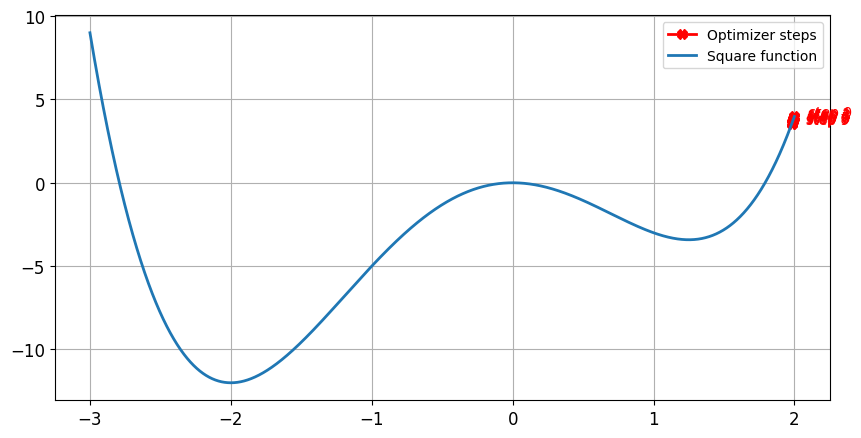

In [104]:
# find the minimum of the non-convex function x**4 + x**3 - 5x**2 in ten steps.
# Try a small learning rate value such that the optimizer isn't able to get past the first minimum on the right.
lr0 = 0.0001
optimize_and_plot(lr=lr0)

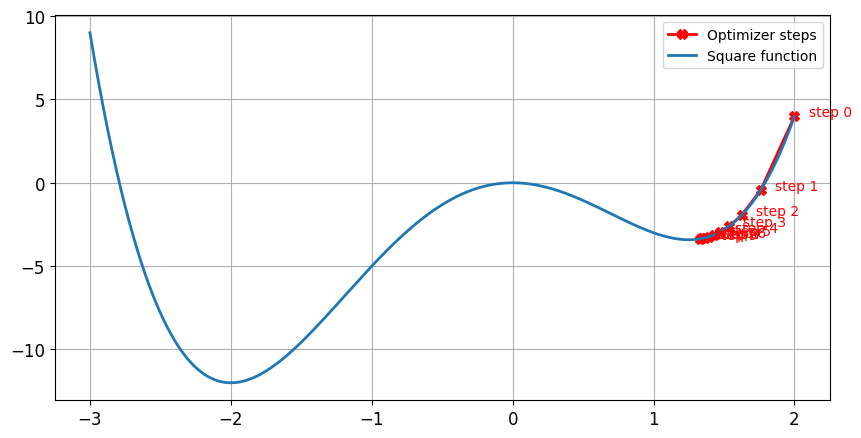

In [105]:
lr0 = 0.01
optimize_and_plot(lr=lr0)

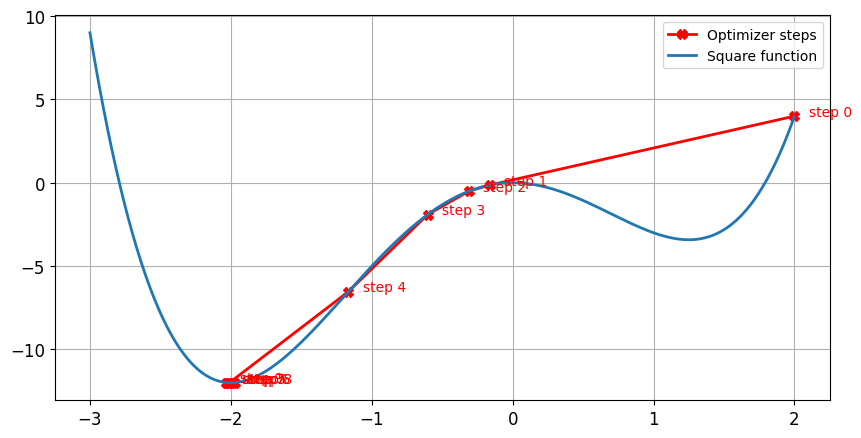

In [100]:
lr2 = 0.09
optimize_and_plot(lr=lr2)

### Experimenting with momentum

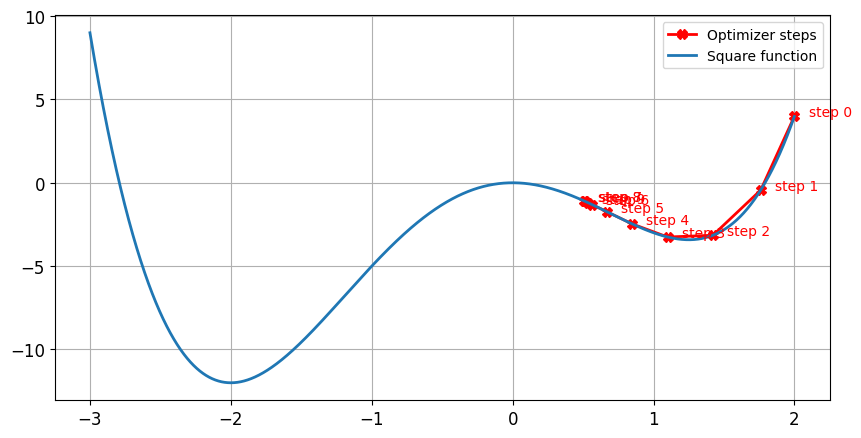

In [106]:
# Try a first value for momentum
mom0 = 0.85
optimize_and_plot(momentum=mom0)

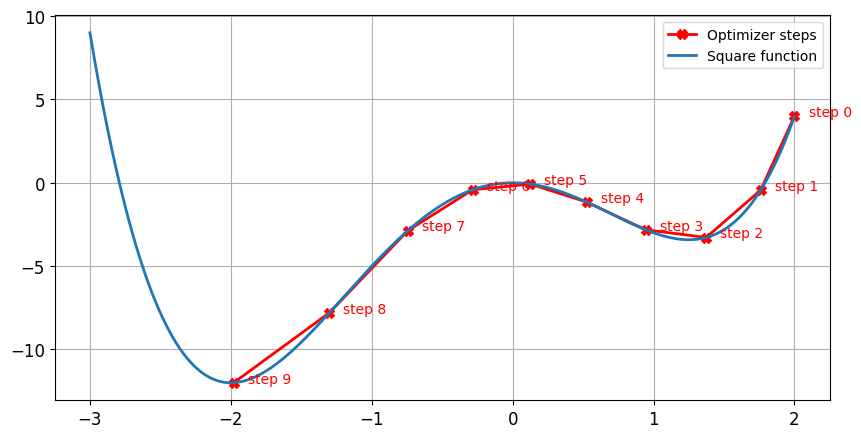

In [113]:
# Try a second value for momentum
mom1 = 1.051
optimize_and_plot(momentum=mom1)